# **TRATAMIENTO DE LA BASE DE DATOS DE LOS SISMOS - IGP**

## **Primera parte**: Exploración de la data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
filename = "/content/drive/MyDrive/Hackaton/IGP_datos_sismicos.xlsx"
df = pd.read_excel(filename, sheet_name='IGP - Datos sísmicos')
df.head()

,fecha UTC,hora UTC,latitud (º),longitud (º),profundidad (km),magnitud (M)
0,02/01/2004,05:49:15.00,-7.8189,-74.3327,156,4.9
1,02/01/2004,14:49:10.00,-14.6878,-72.4438,112,4.9
2,02/01/2004,22:42:45.00,-3.4768,-80.7734,58,4.6
3,03/01/2004,21:08:21.00,-16.5955,-71.3884,115,5.3
4,04/01/2004,09:07:20.00,-4.8544,-77.0825,89,4.5


In [ ]:
df.shape

(12880, 6)

El dataset de los sismos se encuentra conformado por 6 atributos (columnas) y 12880 registros.

In [ ]:
df.isnull().sum()

fecha UTC           0
hora UTC            0
latitud (º)         0
longitud (º)        0
profundidad (km)    0
magnitud (M)        0
dtype: int64

El dataset no presenta datos nulos o faltantes.

In [ ]:
df.describe()

,latitud (º),longitud (º),profundidad (km),magnitud (M)
count,12880.000000,12880.000000,12880.000000,12880.000000
mean,-11.335360,-75.597296,74.503339,4.607508
std,4.611362,3.224211,66.906821,0.430346
min,-23.397100,-82.893700,0.000000,3.000000
25%,-15.550900,-77.807100,29.000000,4.500000
50%,-11.691150,-75.683450,51.000000,4.600000
75%,-7.640250,-73.234725,115.000000,4.800000
max,-1.490000,-66.980700,743.000000,8.000000


En un primer alcance, la latitud y longitud deberían ser columnas que deberían ser eliminadas debido a que no brindan mayor información. No obstante, teniendo en cuenta que luego este dataset se unirá a otro más grande para su posterior análisis, es necesario convertir ambas columnas en información interpretable como País, Región, Provincia, Distrito.

## **Segunda parte:** Transformación de los atributos Latitud y Longitud

Para transformar ambos atributos, se utilizará la librería geopy la cual utiliza geocodificación directa e inversa. En el caso de la directa, se le introduce datos como la provincia y devuelve los datos de la longitud y la latitud. En el caso de la inversa, el ingreso de los datos es lo contrario a la directa para obtener datos como el país, la región, la provincia y el distrito.

In [ ]:
!pip install geopy

In [ ]:
pais=[]
region=[]
provincia=[]
distrito=[]

In [ ]:
df1=df.loc[:4000,:].copy()
df2=df.loc[4001:8000,:].copy()
df3=df.loc[8001:12000,:].copy()
df4=df.loc[12001:,:].copy()

### **Obtener el país**

In [ ]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time

def obtener_pais(latitud, longitud):
    geolocalizador = Nominatim(user_agent="geo_info")

    max_reintentos = 3
    reintentos = 0

    while reintentos < max_reintentos:
        try:
            ubicacion = geolocalizador.reverse((latitud, longitud), exactly_one=True, language="es", timeout=10)
            if ubicacion:
                direccion = ubicacion.raw["address"]
                country = direccion.get("country_code","")
                region = direccion.get("state", "")
                provincia = direccion.get("region", "")
                distrito = direccion.get("city", "")
                if "city" not in direccion:
                    distrito = direccion.get("town", "")
                return country
            else:
                return "No se encontró información de ubicación para las coordenadas proporcionadas"
        except GeocoderTimedOut:
            reintentos += 1
            print("Reintentando la solicitud ({}/{} intentos)".format(reintentos, max_reintentos))
            time.sleep(2)  # Espera 2 segundos antes de volver a intentar

    return "Error: Se alcanzó el número máximo de reintentos"



In [ ]:
pais.append(df1.apply(lambda row: obtener_pais(row['latitud (º)'], row['longitud (º)']), axis=1))

In [ ]:
pais.append(df2.apply(lambda row: obtener_pais(row['latitud (º)'], row['longitud (º)']), axis=1))

In [ ]:
pais.append(df3.apply(lambda row: obtener_pais(row['latitud (º)'], row['longitud (º)']), axis=1))

In [ ]:
pais.append(df4.apply(lambda row: obtener_pais(row['latitud (º)'], row['longitud (º)']), axis=1))

In [ ]:
pa = [elemento for sublista in pais for elemento in sublista]

12880

In [ ]:
df['Pais']=pa

In [ ]:
df.head()

,fecha UTC,hora UTC,latitud (º),longitud (º),profundidad (km),magnitud (M),Pais
0,02/01/2004,05:49:15.00,-7.8189,-74.3327,156,4.9,pe
1,02/01/2004,14:49:10.00,-14.6878,-72.4438,112,4.9,pe
2,02/01/2004,22:42:45.00,-3.4768,-80.7734,58,4.6,pe
3,03/01/2004,21:08:21.00,-16.5955,-71.3884,115,5.3,pe
4,04/01/2004,09:07:20.00,-4.8544,-77.0825,89,4.5,pe


In [ ]:
df.to_excel("Sismos 1.xlsx",index=False)

### **Obtener región**

In [ ]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time

def obtener_r(latitud, longitud):
    geolocalizador = Nominatim(user_agent="geo_info")

    max_reintentos = 3
    reintentos = 0

    while reintentos < max_reintentos:
        try:
            ubicacion = geolocalizador.reverse((latitud, longitud), exactly_one=True, language="es", timeout=10)
            if ubicacion:
                direccion = ubicacion.raw["address"]
                country = direccion.get("country_code","")
                region = direccion.get("state", "")
                provincia = direccion.get("region", "")
                distrito = direccion.get("city", "")
                if "city" not in direccion:
                    distrito = direccion.get("town", "")
                return region
            else:
                return "No se encontró información de ubicación para las coordenadas proporcionadas"
        except GeocoderTimedOut:
            reintentos += 1
            print("Reintentando la solicitud ({}/{} intentos)".format(reintentos, max_reintentos))
            time.sleep(2)  # Espera 2 segundos antes de volver a intentar

    return "Error: Se alcanzó el número máximo de reintentos"


In [ ]:
region.append(df1.apply(lambda row: obtener_r(row['latitud (º)'], row['longitud (º)']), axis=1))

In [ ]:
region.append(df2.apply(lambda row: obtener_r(row['latitud (º)'], row['longitud (º)']), axis=1))

In [ ]:
region.append(df3.apply(lambda row: obtener_r(row['latitud (º)'], row['longitud (º)']), axis=1)) #correr de nuevo

In [ ]:
region.append(df4.apply(lambda row: obtener_r(row['latitud (º)'], row['longitud (º)']), axis=1))

In [ ]:
re = [elemento for sublista in region for elemento in sublista]

In [ ]:
df['Region']=re

In [ ]:
df.to_excel("Sismos 2.xlsx",index=False)

### **Obtener provincia**

In [ ]:
def obtener_p(latitud, longitud):
    geolocalizador = Nominatim(user_agent="geo_info")

    max_reintentos = 3
    reintentos = 0

    while reintentos < max_reintentos:
        try:
            ubicacion = geolocalizador.reverse((latitud, longitud), exactly_one=True, language="es", timeout=10)
            if ubicacion:
                direccion = ubicacion.raw["address"]
                country = direccion.get("country_code","")
                region = direccion.get("state", "")
                provincia = direccion.get("region", "")
                distrito = direccion.get("city", "")
                if "city" not in direccion:
                    distrito = direccion.get("town", "")
                return provincia
            else:
                return "No se encontró información de ubicación para las coordenadas proporcionadas"
        except GeocoderTimedOut:
            reintentos += 1
            print("Reintentando la solicitud ({}/{} intentos)".format(reintentos, max_reintentos))
            time.sleep(2)  # Espera 2 segundos antes de volver a intentar

    return "Error: Se alcanzó el número máximo de reintentos"

In [ ]:
provincia.append(df1.apply(lambda row: obtener_p(row['latitud (º)'], row['longitud (º)']), axis=1))

In [ ]:
provincia.append(df2.apply(lambda row: obtener_p(row['latitud (º)'], row['longitud (º)']), axis=1))

In [ ]:
provincia.append(df3.apply(lambda row: obtener_p(row['latitud (º)'], row['longitud (º)']), axis=1))

In [ ]:
provincia.append(df4.apply(lambda row: obtener_p(row['latitud (º)'], row['longitud (º)']), axis=1))

In [ ]:
pro = [elemento for sublista in provincia for elemento in sublista]

In [ ]:
df['Provincia']=pro

In [ ]:
df.to_excel("Sismos 3.xlsx",index=False)

### **Obtener distrito**

In [ ]:
def obtener_d(latitud, longitud):
    geolocalizador = Nominatim(user_agent="geo_info")

    max_reintentos = 3
    reintentos = 0

    while reintentos < max_reintentos:
        try:
            ubicacion = geolocalizador.reverse((latitud, longitud), exactly_one=True, language="es", timeout=10)
            if ubicacion:
                direccion = ubicacion.raw["address"]
                country = direccion.get("country_code","")
                region = direccion.get("state", "")
                provincia = direccion.get("region", "")
                distrito = direccion.get("city", "")
                if "city" not in direccion:
                    distrito = direccion.get("town", "")
                return distrito
            else:
                return "No se encontró información de ubicación para las coordenadas proporcionadas"
        except GeocoderTimedOut:
            reintentos += 1
            print("Reintentando la solicitud ({}/{} intentos)".format(reintentos, max_reintentos))
            time.sleep(2)  # Espera 2 segundos antes de volver a intentar

    return "Error: Se alcanzó el número máximo de reintentos"

In [ ]:
distrito.append(df1.apply(lambda row: obtener_d(row['latitud (º)'], row['longitud (º)']), axis=1))

In [ ]:
distrito.append(df2.apply(lambda row: obtener_d(row['latitud (º)'], row['longitud (º)']), axis=1))

In [ ]:
distrito.append(df3.apply(lambda row: obtener_d(row['latitud (º)'], row['longitud (º)']), axis=1))

In [ ]:
distrito.append(df4.apply(lambda row: obtener_d(row['latitud (º)'], row['longitud (º)']), axis=1))

In [ ]:
dis = [elemento for sublista in distrito for elemento in sublista]

In [ ]:
df['Distrito']=dis

In [ ]:
df.to_excel("Sismos 4.xlsx",index=False)

---------------------------------------------------------------------------

## **Tercera parte:** Exploración de la data transformada

In [ ]:
import pandas as pd
import numpy as np
filename = "Sismos.xlsx"
df = pd.read_excel(filename, sheet_name='Sheet1')
df.head()

,fecha UTC,hora UTC,latitud (º),longitud (º),profundidad (km),magnitud (M),Pais,Region,Provincia,Distrito
0,02/01/2004,05:49:15.00,-7.8189,-74.3327,156,4.9,pe,Ucayali,Coronel Portillo,Callería
1,02/01/2004,14:49:10.00,-14.6878,-72.4438,112,4.9,pe,Cusco,Chumbivilcas,Santo Tomás
2,02/01/2004,22:42:45.00,-3.4768,-80.7734,58,4.6,pe,NaN,NaN,NaN
3,03/01/2004,21:08:21.00,-16.5955,-71.3884,115,5.3,pe,Arequipa,Arequipa,NaN
4,04/01/2004,09:07:20.00,-4.8544,-77.0825,89,4.5,pe,Loreto,Datem del Marañón,NaN


In [ ]:
df.shape

(12880, 10)

Después de la transformación de los datos, se obtiene un nuevo dataframe con 10 atributos y 12880 registros.

### **1. Tratamiento de datos nulos**

Se revisará si se presentan datos nulos en el nuevo dataframe.

In [ ]:
df.head(10)

,fecha UTC,hora UTC,latitud (º),longitud (º),profundidad (km),magnitud (M),Pais,Region,Provincia,Distrito
0,02/01/2004,05:49:15.00,-7.8189,-74.3327,156,4.9,pe,Ucayali,Coronel Portillo,Callería
1,02/01/2004,14:49:10.00,-14.6878,-72.4438,112,4.9,pe,Cusco,Chumbivilcas,Santo Tomás
2,02/01/2004,22:42:45.00,-3.4768,-80.7734,58,4.6,pe,NaN,NaN,NaN
3,03/01/2004,21:08:21.00,-16.5955,-71.3884,115,5.3,pe,Arequipa,Arequipa,NaN
4,04/01/2004,09:07:20.00,-4.8544,-77.0825,89,4.5,pe,Loreto,Datem del Marañón,NaN
5,04/01/2004,16:13:54.00,-3.1754,-77.7785,137,5.3,pe,Loreto,Datem del Marañón,Morona
6,05/01/2004,01:17:44.00,-8.7061,-79.9354,61,4.5,pe,NaN,NaN,NaN
7,05/01/2004,10:41:51.00,-16.7030,-73.5713,25,4.9,pe,NaN,NaN,NaN
8,08/01/2004,21:19:49.00,-4.9495,-80.3153,27,5.3,pe,Piura,Piura,Tambo Grande
9,08/01/2004,22:22:17.00,-6.5493,-81.5027,33,4.5,pe,NaN,NaN,NaN


In [ ]:
df.describe()

,latitud (º),longitud (º),profundidad (km),magnitud (M)
count,12880.000000,12880.000000,12880.000000,12880.000000
mean,-11.335360,-75.597296,74.503339,4.607508
std,4.611362,3.224211,66.906821,0.430346
min,-23.397100,-82.893700,0.000000,3.000000
25%,-15.550900,-77.807100,29.000000,4.500000
50%,-11.691150,-75.683450,51.000000,4.600000
75%,-7.640250,-73.234725,115.000000,4.800000
max,-1.490000,-66.980700,743.000000,8.000000


In [ ]:
df.isnull().sum()

fecha UTC              0
hora UTC               0
latitud (º)            0
longitud (º)           0
profundidad (km)       0
magnitud (M)           0
Pais                   0
Region              4234
Provincia           4801
Distrito            6749
dtype: int64

**1.1. Revisión de datos nulos en las tres columnas: Región, Provincia, Distrito**

In [ ]:
df[df['Region'].isnull()==True]

,fecha UTC,hora UTC,latitud (º),longitud (º),profundidad (km),magnitud (M),Pais,Region,Provincia,Distrito
2,02/01/2004,22:42:45.00,-3.4768,-80.7734,58,4.6,pe,NaN,NaN,NaN
6,05/01/2004,01:17:44.00,-8.7061,-79.9354,61,4.5,pe,NaN,NaN,NaN
7,05/01/2004,10:41:51.00,-16.7030,-73.5713,25,4.9,pe,NaN,NaN,NaN
9,08/01/2004,22:22:17.00,-6.5493,-81.5027,33,4.5,pe,NaN,NaN,NaN
10,10/01/2004,02:22:24.00,-9.2581,-79.3864,45,5.1,pe,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12864,26/08/2023,01:43:57,-15.6400,-69.6000,247,4.6,pe,NaN,NaN,NaN
12866,28/08/2023,04:14:44,-18.2600,-71.5100,26,4.9,pe,NaN,NaN,NaN
12867,28/08/2023,05:38:05,-18.2500,-71.4100,33,4.3,pe,NaN,NaN,NaN
12874,16/12/2022,10:23:48,-7.2400,-80.9600,20,5.1,pe,NaN,NaN,NaN


In [ ]:
indices=df[df['Region'].isnull()==True].index

Al observar el dataframe con los datos vacíos y realizar pruebas manuales, se logra discernir que los datos faltantes correspondes a sismos que ocurrieron en el mar. Si bien es cierto, se puede etiquetar estos datos con el nombre "Mar" no brindaría mucho valor a nuestro análisis de las viviendas por distrito. Por ello, se procedera a eliminar estos registros.

In [ ]:
df.drop(indices,inplace=True)

In [ ]:
df.shape

(8646, 10)

Después de la eliminación, el dataframe se queda con 8646 registros. Continuamos revisando las otras columnas en caso presenten datos nulos.

In [ ]:
df.isnull().sum()

fecha UTC              0
hora UTC               0
latitud (º)            0
longitud (º)           0
profundidad (km)       0
magnitud (M)           0
Pais                   0
Region                 0
Provincia            576
Distrito            2524
dtype: int64

**1.2. Revisión de datos nulos en dos columnas: Provincia, Distrito**

In [ ]:
rev=df[(df['Provincia'].isnull()==True)&(df['Distrito'].isnull()==True)]
rev.shape

(207, 10)

Se observa que hay 207 datos nulos para las dos columnas de Provincia y Distrito. No obstante, tenemos que revisar si estos datos corresponden a Perú o si otro país.

***Insertar imagen **texto en negrita**

In [ ]:
rev['Pais'].unique()

array(['ec', 'bo', 'cl', 'ar'], dtype=object)

Observamos que estos registros corresponden a sismos cuyo epicentro fue localizado en otro país. En este punto, es importante considerar que se podría realizar el análisis de la expansión del sismo; no obstante, la data presente no cuenta con los datos suficientes para realizar ese cálculo. Por ello, procedemos a eliminar estos registros que no se encuentran ubicados en Perú.

In [ ]:
revi=rev.index

In [ ]:
df.drop(revi,inplace=True)

In [ ]:
df.shape

(8439, 10)

Después de eliminar estos registros, quedan 8439 registros.

In [ ]:
df.isnull().sum()

fecha UTC              0
hora UTC               0
latitud (º)            0
longitud (º)           0
profundidad (km)       0
magnitud (M)           0
Pais                   0
Region                 0
Provincia            369
Distrito            2317
dtype: int64

**1.3. Revisión de datos nulos en la columna: Distrito**

In [ ]:
df[df['Distrito'].isnull()==True]

,fecha UTC,hora UTC,latitud (º),longitud (º),profundidad (km),magnitud (M),Pais,Region,Provincia,Distrito
3,03/01/2004,21:08:21.00,-16.5955,-71.3884,115,5.3,pe,Arequipa,Arequipa,NaN
4,04/01/2004,09:07:20.00,-4.8544,-77.0825,89,4.5,pe,Loreto,Datem del Marañón,NaN
11,10/01/2004,16:27:49.00,-4.3689,-80.9949,11,4.5,pe,Piura,Talara,NaN
20,19/01/2004,13:05:37.00,-7.2278,-78.3112,22,4.5,pe,Cajamarca,Cajamarca,NaN
22,21/01/2004,01:26:13.00,-3.6924,-80.3290,42,4.5,pe,Tumbes,Tumbes,NaN
...,...,...,...,...,...,...,...,...,...,...
12831,08/08/2023,02:55:26,-9.2400,-74.9500,120,4.1,pe,Huánuco,Puerto Inca,NaN
12839,12/08/2023,14:36:46,-9.0100,-74.4900,150,4.0,pe,Ucayali,Coronel Portillo,NaN
12873,16/12/2022,05:56:51,-11.4200,-76.3400,18,4.8,pe,Junín,Yauli,NaN
12875,27/12/2022,14:38:09,-11.5400,-76.9200,89,4.1,pe,Lima,Huaral,NaN


Todavía quedan datos faltantes en el distrito. Para evaluar cómo tratar estos datos, se analizan las columnas adyacentes.

In [ ]:
df['Region'].unique()

array(['Ucayali', 'Cusco', 'Arequipa', 'Loreto', 'Piura', 'San Martín',
       'Amazonas', 'Cajamarca', 'Tumbes', 'Áncash', 'Moquegua', 'El Oro',
       'Huánuco', 'Junín', 'Lambayeque', 'Ayacucho',
       'Región de Arica y Parinacota', 'Apurímac', 'Ica', 'La Libertad',
       'Tacna', 'Puno', 'Lima', 'Huancavelica',
       'No se encontró información de ubicación para las coordenadas proporcionadas',
       'Pasco', 'Loja', 'La Paz', 'Madre de Dios', 'Acre',
       'Morona Santiago', 'Guayas', 'Zamora Chinchipe',
       'Región de Tarapacá', 'Región de Antofagasta', 'Oruro',
       'Chimborazo', 'Pastaza'], dtype=object)

Se observa que hay Regiones que no corresponden como tal al Perú.

In [ ]:
df['Pais'].unique()

array(['pe', 'ec', 'cl',
       'No se encontró información de ubicación para las coordenadas proporcionadas',
       'bo', 'br'], dtype=object)

Teniendo en cuenta que solo nos interesa los sismos que tuvieron como epicentro en algún lugar del Perú, eliminamos los otros países y los desconocidos.

In [ ]:
rep=df[df['Pais']!='pe'].index

In [ ]:
df.drop(rep,inplace=True)

In [ ]:
df.shape

(7870, 10)

In [ ]:
df.isnull().sum()

fecha UTC              0
hora UTC               0
latitud (º)            0
longitud (º)           0
profundidad (km)       0
magnitud (M)           0
Pais                   0
Region                 0
Provincia              0
Distrito            2315
dtype: int64

Después de eliminar los datos de los otros países, se ha solucionado el tema de los datos nulos en provincia. Ahora, solo queda observar cómo se tratará la columna distrito.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dfrd=df[df['Distrito'].isnull()==True]

In [ ]:
dfrd.shape

(2315, 10)

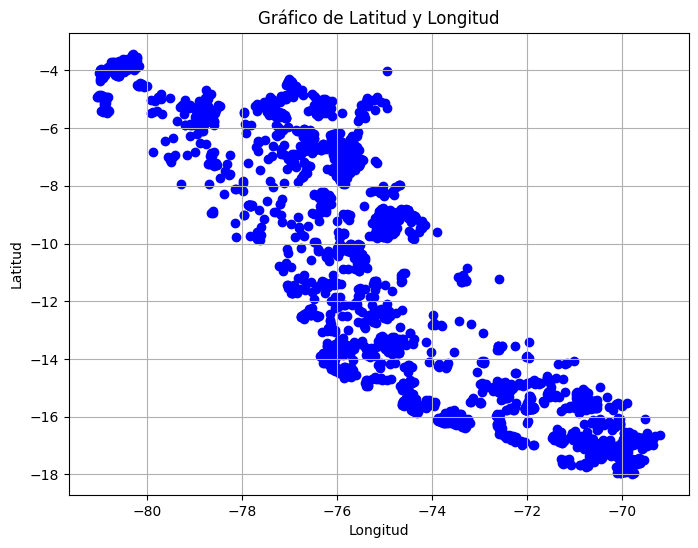

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(dfrd['longitud (º)'], dfrd['latitud (º)'], c='b')
plt.title('Gráfico de Latitud y Longitud')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [ ]:
indices1=dfrd[dfrd['Region']==dfrd['Provincia']].index

In [ ]:
indices2=dfrd[dfrd['Region']!=dfrd['Provincia']].index

In [ ]:
g=df[(df['Region']==df['Provincia'])&(df['Provincia']==df['Distrito'])]

In [ ]:
g.drop_duplicates(subset='Region', keep='first', inplace=True)

<ipython-input-63-3e7d6a68d855>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g.drop_duplicates(subset='Region', keep='first', inplace=True)


In [ ]:
indices1T=g.index

In [ ]:
h=df[(df['Region']!=df['Provincia'])&(df['Provincia']==df['Distrito'])]

In [ ]:
h.drop_duplicates(subset='Provincia', keep='first', inplace=True)

<ipython-input-67-d04bab428a77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h.drop_duplicates(subset='Provincia', keep='first', inplace=True)


In [ ]:
indices2T=h.index

Imputamos los valores de Distrito con los valores de Provincia para que los datos se encuentren "centralizados".

In [ ]:
df['Distrito'].fillna(df['Provincia'], inplace=True)

In [ ]:
df.isnull().sum()

fecha UTC           0
hora UTC            0
latitud (º)         0
longitud (º)        0
profundidad (km)    0
magnitud (M)        0
Pais                0
Region              0
Provincia           0
Distrito            0
dtype: int64

Como se puede observar ya no hay datos nulos, pero todavía tenemos que actualizar los datos de la latitud y la longitud de cada registro.

### **2. Actualización de la latitud y longitud**

In [ ]:
data=df.loc[indices1]

In [ ]:
tot = pd.concat([g, h])

In [ ]:
y=tot[['latitud (º)','longitud (º)','Distrito']]

In [ ]:
dfTotal=data.merge(y,on='Distrito',how='left')
# Reemplazar los valores en 'valor1' con los valores de 'nuevo_valor'
dfTotal['latitud (º)_x'] = dfTotal['latitud (º)_y'].fillna(dfTotal['latitud (º)_x'])
dfTotal.drop('latitud (º)_y', axis=1, inplace=True)

In [ ]:
# Reemplazar los valores en 'valor1' con los valores de 'nuevo_valor'
dfTotal['longitud (º)_x'] = dfTotal['longitud (º)_y'].fillna(dfTotal['longitud (º)_x'])
dfTotal.drop('longitud (º)_y', axis=1, inplace=True)

In [ ]:
dfTotal=dfTotal.set_index(indices1)

In [ ]:
dfTotal = dfTotal.rename(columns={'latitud (º)_x': 'latitud (º)'})
dfTotal = dfTotal.rename(columns={'longitud (º)_x': 'longitud (º)'})

In [ ]:
dfTotal.head()

,fecha UTC,hora UTC,latitud (º),longitud (º),profundidad (km),magnitud (M),Pais,Region,Provincia,Distrito
3,03/01/2004,21:08:21.00,-16.5955,-71.3884,115,5.3,pe,Arequipa,Arequipa,Arequipa
20,19/01/2004,13:05:37.00,-7.1924,-78.5171,22,4.5,pe,Cajamarca,Cajamarca,Cajamarca
22,21/01/2004,01:26:13.00,-3.5912,-80.4483,42,4.5,pe,Tumbes,Tumbes,Tumbes
113,21/04/2004,13:49:42.00,-6.5168,-75.6834,164,4.8,pe,San Martín,San Martín,San Martín
257,06/10/2004,09:54:07.00,-6.7577,-75.9820,148,4.6,pe,San Martín,San Martín,San Martín


In [ ]:
data1=df.loc[indices2]

In [ ]:
dfTotal1=data1.merge(y,on='Distrito',how='left')
# Reemplazar los valores en 'valor1' con los valores de 'nuevo_valor'
dfTotal1['latitud (º)_x'] = dfTotal1['latitud (º)_y'].fillna(dfTotal1['latitud (º)_x'])
dfTotal1.drop('latitud (º)_y', axis=1, inplace=True)

In [ ]:
# Reemplazar los valores en 'valor1' con los valores de 'nuevo_valor'
dfTotal1['longitud (º)_x'] = dfTotal1['longitud (º)_y'].fillna(dfTotal1['longitud (º)_x'])
dfTotal1.drop('longitud (º)_y', axis=1, inplace=True)

In [ ]:
dfTotal1=dfTotal1.set_index(indices2)

In [ ]:
dfTotal1 = dfTotal1.rename(columns={'latitud (º)_x': 'latitud (º)'})
dfTotal1 = dfTotal1.rename(columns={'longitud (º)_x': 'longitud (º)'})

In [ ]:
dfTotal1.head()

,fecha UTC,hora UTC,latitud (º),longitud (º),profundidad (km),magnitud (M),Pais,Region,Provincia,Distrito
4,04/01/2004,09:07:20.00,-4.8544,-77.0825,89,4.5,pe,Loreto,Datem del Marañón,Datem del Marañón
11,10/01/2004,16:27:49.00,-4.3689,-80.9949,11,4.5,pe,Piura,Talara,Talara
34,29/01/2004,02:31:21.00,-3.8977,-80.8269,41,4.5,pe,Tumbes,Contralmirante Villar,Contralmirante Villar
47,13/02/2004,17:41:05.00,-6.7760,-78.0897,12,4.5,pe,Cajamarca,Celendín,Celendín
68,10/03/2004,18:41:27.00,-7.2735,-76.9720,33,4.5,pe,San Martín,Mariscal Cáceres,Mariscal Cáceres


Para combinar los resultados con el dataframe principal vamos a setear los índices de cada conjunto de datos.

In [ ]:
dfS=dfTotal.reset_index()

In [ ]:
y1=dfS[['index','latitud (º)','longitud (º)']]

In [ ]:
dfS1=dfTotal1.reset_index()

In [ ]:
y2=dfS1[['index','latitud (º)','longitud (º)']]

Seteamos el index del dataframe principal

In [ ]:
df.shape

(7870, 10)

In [ ]:
dfback=df.copy() #copia

In [ ]:
indicesO=df.index #indices originales

In [ ]:
df=df.reset_index() #dataset seteado

In [ ]:
df_f=df.merge(y1,on='index',how='left')

In [ ]:
# Reemplazar los valores en 'valor1' con los valores de 'nuevo_valor'
df_f['latitud (º)_x'] = df_f['latitud (º)_y'].fillna(df_f['latitud (º)_x'])
df_f.drop('latitud (º)_y', axis=1, inplace=True)

In [ ]:
# Reemplazar los valores en 'valor1' con los valores de 'nuevo_valor'
df_f['longitud (º)_x'] = df_f['longitud (º)_y'].fillna(df_f['longitud (º)_x'])
df_f.drop('longitud (º)_y', axis=1, inplace=True)

In [ ]:
df_f = df_f.rename(columns={'latitud (º)_x': 'latitud (º)'})
df_f = df_f.rename(columns={'longitud (º)_x': 'longitud (º)'})

In [ ]:
df_f=df.merge(y2,on='index',how='left')

In [ ]:
# Reemplazar los valores en 'valor1' con los valores de 'nuevo_valor'
df_f['latitud (º)_x'] = df_f['latitud (º)_y'].fillna(df_f['latitud (º)_x'])
df_f.drop('latitud (º)_y', axis=1, inplace=True)

In [ ]:
# Reemplazar los valores en 'valor1' con los valores de 'nuevo_valor'
df_f['longitud (º)_x'] = df_f['longitud (º)_y'].fillna(df_f['longitud (º)_x'])
df_f.drop('longitud (º)_y', axis=1, inplace=True)

In [ ]:
df_f = df_f.rename(columns={'latitud (º)_x': 'latitud (º)'})
df_f = df_f.rename(columns={'longitud (º)_x': 'longitud (º)'})

In [ ]:
df_f=df_f.set_index('index')

### **3. Creación de la clave principal**

3.1. Transformación de la columna Fecha

In [ ]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7870 entries, 0 to 12879
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fecha UTC         7870 non-null   object 
 1   hora UTC          7870 non-null   object 
 2   latitud (º)       7870 non-null   float64
 3   longitud (º)      7870 non-null   float64
 4   profundidad (km)  7870 non-null   int64  
 5   magnitud (M)      7870 non-null   float64
 6   Pais              7870 non-null   object 
 7   Region            7870 non-null   object 
 8   Provincia         7870 non-null   object 
 9   Distrito          7870 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 676.3+ KB


In [ ]:
from datetime import datetime

In [ ]:
df_f['fecha UTC'] = pd.to_datetime(df_f['fecha UTC'])

<ipython-input-237-22bd36b7a2fd>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_f['fecha UTC'] = pd.to_datetime(df_f['fecha UTC'])


In [ ]:
df_f['Año'] = df_f['fecha UTC'].dt.year

In [ ]:
df_f.head()

,fecha UTC,hora UTC,latitud (º),longitud (º),profundidad (km),magnitud (M),Pais,Region,Provincia,Distrito,Año
index,,,,,,,,,,,
0,2004-02-01,05:49:15.00,-7.8189,-74.3327,156,4.9,pe,Ucayali,Coronel Portillo,Callería,2004
1,2004-02-01,14:49:10.00,-14.6878,-72.4438,112,4.9,pe,Cusco,Chumbivilcas,Santo Tomás,2004
3,2004-03-01,21:08:21.00,-16.5955,-71.3884,115,5.3,pe,Arequipa,Arequipa,Arequipa,2004
4,2004-04-01,09:07:20.00,-4.8544,-77.0825,89,4.5,pe,Loreto,Datem del Marañón,Datem del Marañón,2004
5,2004-04-01,16:13:54.00,-3.1754,-77.7785,137,5.3,pe,Loreto,Datem del Marañón,Morona,2004


3.2. Creación de la columna "key"

In [ ]:
df_f['Año'] = df_f['Año'].astype(str)

In [ ]:
df_f["key"] = df_f["Region"]+df_f["Provincia"]+df_f["Distrito"]+df_f["Año"]
df_f.head()

,fecha UTC,hora UTC,latitud (º),longitud (º),profundidad (km),magnitud (M),Pais,Region,Provincia,Distrito,Año,key
index,,,,,,,,,,,,
0,2004-02-01,05:49:15.00,-7.8189,-74.3327,156,4.9,pe,Ucayali,Coronel Portillo,Callería,2004,UcayaliCoronel PortilloCallería2004
1,2004-02-01,14:49:10.00,-14.6878,-72.4438,112,4.9,pe,Cusco,Chumbivilcas,Santo Tomás,2004,CuscoChumbivilcasSanto Tomás2004
3,2004-03-01,21:08:21.00,-16.5955,-71.3884,115,5.3,pe,Arequipa,Arequipa,Arequipa,2004,ArequipaArequipaArequipa2004
4,2004-04-01,09:07:20.00,-4.8544,-77.0825,89,4.5,pe,Loreto,Datem del Marañón,Datem del Marañón,2004,LoretoDatem del MarañónDatem del Marañón2004
5,2004-04-01,16:13:54.00,-3.1754,-77.7785,137,5.3,pe,Loreto,Datem del Marañón,Morona,2004,LoretoDatem del MarañónMorona2004


Como se mencionó anteriormente, se eliminarán las filas que correspondan al 2023.

In [ ]:
de=df_f[df_f['Año']=='2023'].index

In [ ]:
df_f.drop(de,inplace=True)

In [ ]:
df_f.to_csv("SismosPrevio.csv",index=False)

### **4. Inclusión de las estadísticas de los sismos**

***Conteo de sismos***

In [ ]:
grupo1=df_f['key'].value_counts()

In [ ]:
grup1=pd.DataFrame(grupo1)

In [ ]:
grup1 = grup1.rename(columns={'key': 'Conteo'})

In [ ]:
grup1=grup1.reset_index()
grup1 = grup1.rename(columns={'index': 'key'})
grup1

,key,Conteo
0,ArequipaCayllomaCaylloma2021,50
1,TacnaTarataTarata2021,48
2,ArequipaCayllomaMaca2020,34
3,PiuraSullanaMiguel Checa2021,32
4,ArequipaCayllomaPinchollo2020,30
...,...,...
3432,TacnaJorge BasadreJorge Basadre2009,1
3433,AyacuchoLucanasCarmen Salcedo2015,1
3434,San MartínBellavistaAlto Biavo2009,1
3435,San MartínTocachePólvora2015,1


In [ ]:
df_f.shape

(7697, 12)

In [ ]:
df_f['key'].nunique()

3437

***Promedio de la magnitud de los sismos***

In [ ]:
prome=df_f[['key','magnitud (M)']].groupby('key').mean()
prome=prome.reset_index()
prome = prome.rename(columns={'magnitud (M)': 'Promedio'})
prome

,key,Promedio
0,AmazonasBaguaBagua2004,4.5
1,AmazonasBaguaBagua2011,4.5
2,AmazonasBaguaBagua2015,4.5
3,AmazonasBaguaBagua2020,4.2
4,AmazonasBaguaImaza2004,4.7
...,...,...
3432,ÁncashSihuasSan Juan2013,4.6
3433,ÁncashSihuasSihuas2013,4.5
3434,ÁncashSihuasSihuas2020,3.5
3435,ÁncashYungayYungay2009,4.5


***Magnitud mínima de los sismos***

In [ ]:
prome1=df_f[['key','magnitud (M)']].groupby('key').min()

In [ ]:
prome1=prome1.reset_index()
prome1 = prome1.rename(columns={'magnitud (M)': 'Min_Mag'})
prome1

,key,Min_Mag
0,AmazonasBaguaBagua2004,4.5
1,AmazonasBaguaBagua2011,4.5
2,AmazonasBaguaBagua2015,4.5
3,AmazonasBaguaBagua2020,4.2
4,AmazonasBaguaImaza2004,4.6
...,...,...
3432,ÁncashSihuasSan Juan2013,4.6
3433,ÁncashSihuasSihuas2013,4.5
3434,ÁncashSihuasSihuas2020,3.5
3435,ÁncashYungayYungay2009,4.5


***Magnitud máxima de los sismos***

In [ ]:
prome2=df_f[['key','magnitud (M)']].groupby('key').max()

In [ ]:
prome2=prome2.reset_index()
prome2 = prome2.rename(columns={'magnitud (M)': 'Max_Mag'})
prome2

,key,Max_Mag
0,AmazonasBaguaBagua2004,4.5
1,AmazonasBaguaBagua2011,4.5
2,AmazonasBaguaBagua2015,4.5
3,AmazonasBaguaBagua2020,4.2
4,AmazonasBaguaImaza2004,4.8
...,...,...
3432,ÁncashSihuasSan Juan2013,4.6
3433,ÁncashSihuasSihuas2013,4.5
3434,ÁncashSihuasSihuas2020,3.5
3435,ÁncashYungayYungay2009,4.5


In [ ]:
dfComp=grup1.merge(prome,on='key',how='left')

In [ ]:
dfComp=dfComp.merge(prome1,on='key',how='left')

In [ ]:
dfComp=dfComp.merge(prome2,on='key',how='left')

In [ ]:
dfComp.shape

(3437, 5)

In [ ]:
dfComp.head()

,key,Conteo,Promedio,Min_Mag,Max_Mag
0,ArequipaCayllomaCaylloma2021,50,3.804000,3.4,5.5
1,TacnaTarataTarata2021,48,3.795833,3.2,5.0
2,ArequipaCayllomaMaca2020,34,3.458824,3.2,3.9
3,PiuraSullanaMiguel Checa2021,32,3.940625,3.5,4.8
4,ArequipaCayllomaPinchollo2020,30,3.506667,3.3,3.9


## **Descarga**

In [ ]:
dfComp.to_csv("Sismos_completo.csv",index=False)

## **Análisis de la data**

In [ ]:
import pandas as pd
dataSP=pd.read_csv('SismosPrevio.csv')
dataSP.head()

,fecha UTC,hora UTC,latitud (º),longitud (º),profundidad (km),magnitud (M),Pais,Region,Provincia,Distrito,Año,key
0,2004-02-01,05:49:15.00,-7.8189,-74.3327,156,4.9,pe,Ucayali,Coronel Portillo,Callería,2004,UcayaliCoronel PortilloCallería2004
1,2004-02-01,14:49:10.00,-14.6878,-72.4438,112,4.9,pe,Cusco,Chumbivilcas,Santo Tomás,2004,CuscoChumbivilcasSanto Tomás2004
2,2004-03-01,21:08:21.00,-16.5955,-71.3884,115,5.3,pe,Arequipa,Arequipa,Arequipa,2004,ArequipaArequipaArequipa2004
3,2004-04-01,09:07:20.00,-4.8544,-77.0825,89,4.5,pe,Loreto,Datem del Marañón,Datem del Marañón,2004,LoretoDatem del MarañónDatem del Marañón2004
4,2004-04-01,16:13:54.00,-3.1754,-77.7785,137,5.3,pe,Loreto,Datem del Marañón,Morona,2004,LoretoDatem del MarañónMorona2004


***Comparación de la cantidad de sismos***

In [ ]:
m1=dataSP[dataSP['Año']==2004]
m2=dataSP[dataSP['Año']==2022]

In [ ]:
import matplotlib.pyplot as plt

**Sismos en el Perú entre los años 2004 - 2022**

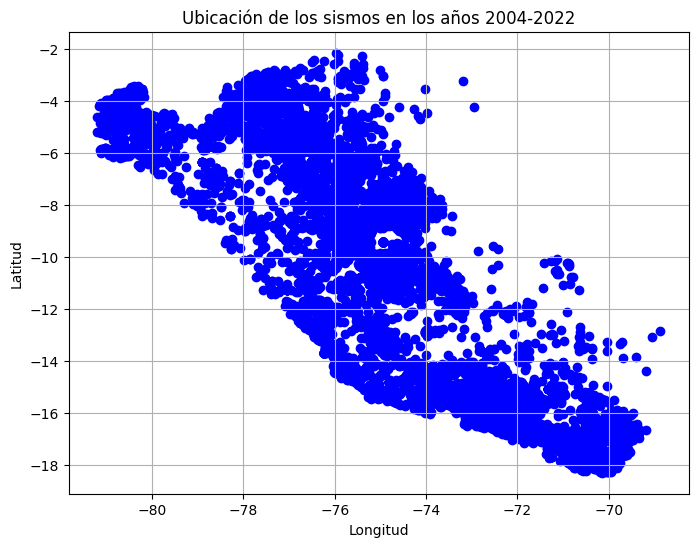

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(dataSP['longitud (º)'], dataSP['latitud (º)'], c='b')
plt.title('Ubicación de los sismos en los años 2004-2022')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)

# Mostrar el gráfico
plt.show()

En este primer gráfico, se puede observar que la mayoría de sismos se encuentran localizados en la zona costa y sierra del Perú. Se observa mayor actividad sísmica en las regiones Centro y Sur, y moderada en la Norte (CENSIS, s.f.).

**Conteo de los sismos a lo largo de los años**

In [ ]:
contador=dataSP['Año'].value_counts()

In [ ]:
promA=dataSP[['magnitud (M)','Año']].groupby('Año').mean() #promedio por año

In [ ]:
contador=pd.DataFrame(contador)

In [ ]:
contador=contador.reset_index()

In [ ]:
contador=contador.rename(columns={'Año': 'Conteo'})
contador=contador.rename(columns={'index': 'Año'})

In [ ]:
contador.sort_values(by=['Año'],ascending=True,inplace=True)

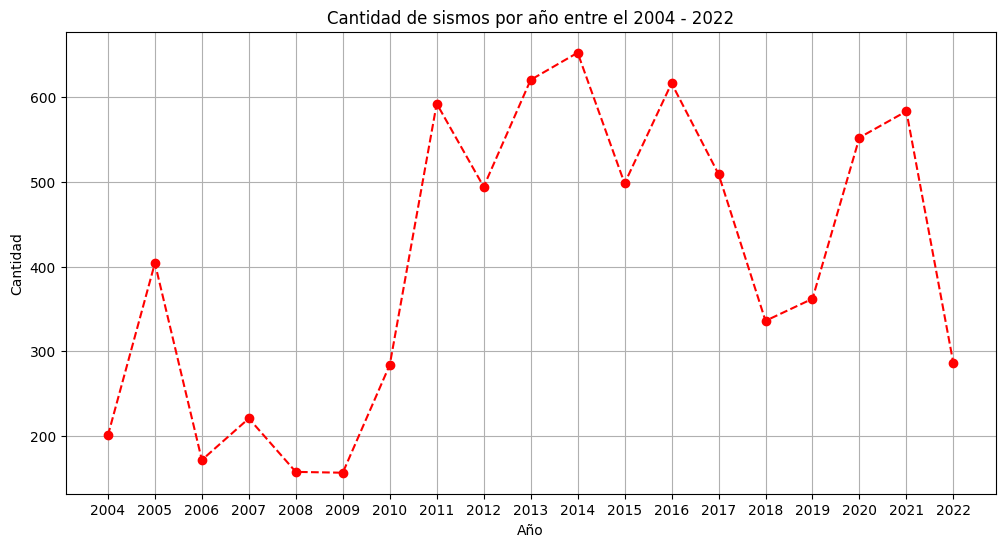

In [ ]:
#color: rojo (red, r), marcador: círculo (o), línea: --
plt.figure(figsize=(12, 6))
plt.xticks(contador['Año'])
plt.title('Cantidad de sismos por año entre el 2004 - 2022')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.grid(True)
plt.plot(contador['Año'], contador['Conteo'] , 'or--')

Se puede visualizar que, por lo general, ocurren más de 100 sismos. No obstante, se puede observar que mayormente ocurren más de 250 sismos siendo pocos años los que ocurren menos de esa cantidad.

**Cantidad de sismos por año con el tamaño de la burbuja del promedio de magnitud**

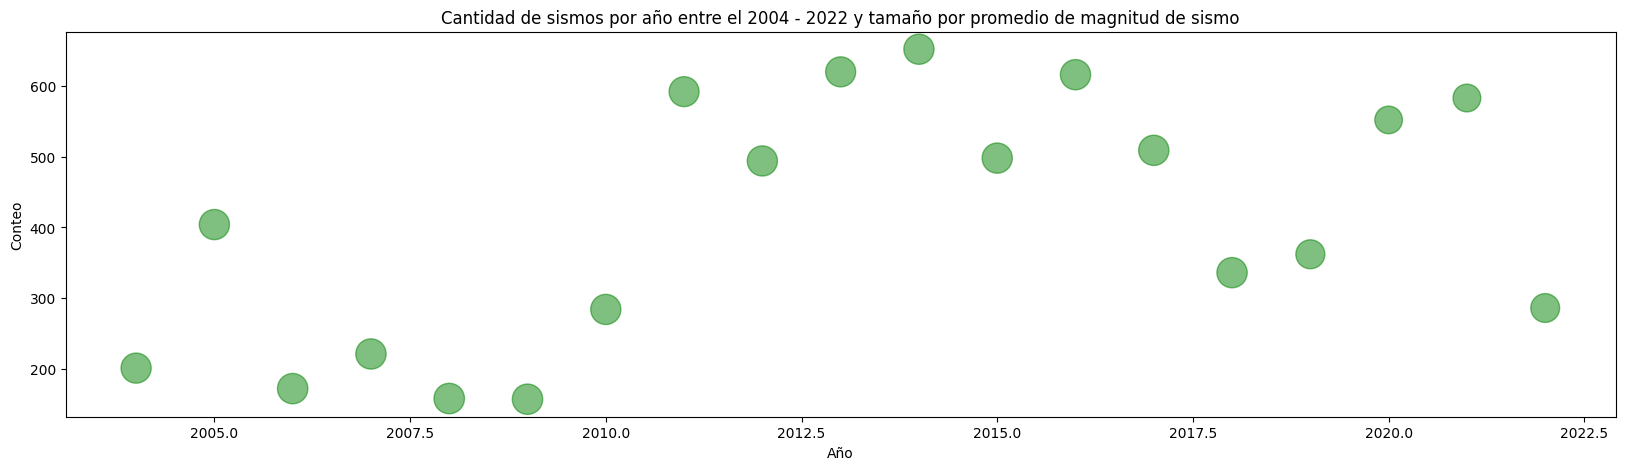

In [ ]:
contador.plot(kind='scatter',
                    x='Año',
                    y='Conteo',
                    figsize=(20,5),
                    alpha=0.5,   # transparencia
                    color='green',
                    s= promA['magnitud (M)']*100, #tamaño burbuja: proporcional al promedio
                    ) # rango de variación en X

plt.title('Cantidad de sismos por año entre el 2004 - 2022 y tamaño por promedio de magnitud de sismo')

plt.show()

Se puede observar que el promedio de la magnitud de sismos por año no varían significativamente.

**Sismos en el Perú en el año 2004**

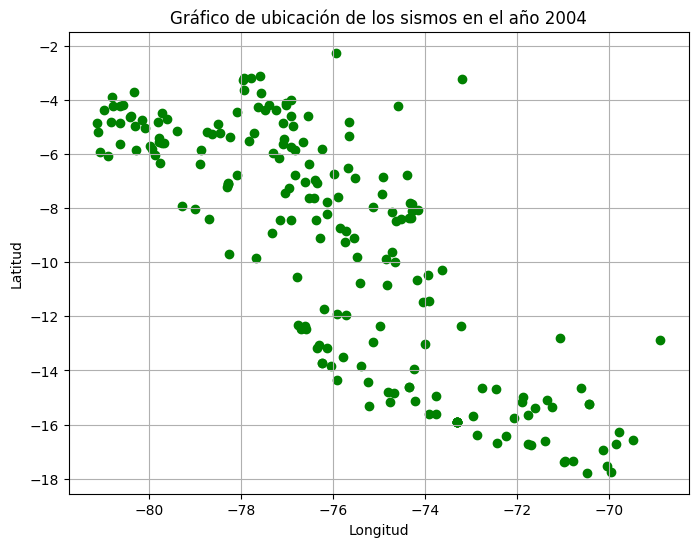

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(m1['longitud (º)'], m1['latitud (º)'], c='g')
plt.title('Gráfico de ubicación de los sismos en el año 2004')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)

# Mostrar el gráfico
plt.show()

Tal como se identifica en el gráfico de todos los sismos, se logra discernir que los sismos se concentran en la zona costa y sierra del Perú. No obstante, se puede discernir que existe una mayor concentración de sismos en el norte.

**Sismos en el Perú en el año 2022**

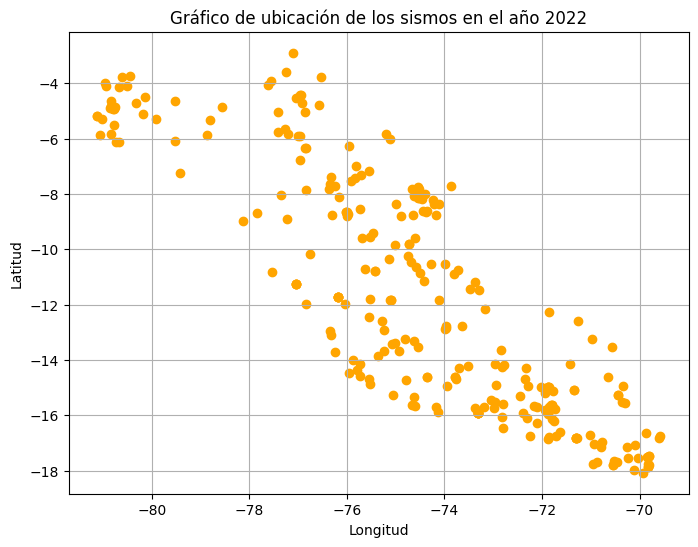

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(m2['longitud (º)'], m2['latitud (º)'], c='orange')
plt.title('Gráfico de ubicación de los sismos en el año 2022')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)

# Mostrar el gráfico
plt.show()

Tal como se mencionó, los sismos se concentran en la zona costa y sierra; no obstante, a diferencia del gráfico del 2004, los sismos presentan una mayor concentranción en el sur y en el centro.